In [1]:
#Problemzeiten einlesen und aufbereiten

import csv
import pandas as pd
dateipfad = './cluster_ergebnisse.csv'
df_Cluster = pd.read_csv(dateipfad)


In [2]:
#Feature Daten einlesen und aufbereiten

dateipfad = './FeatureVecs'
try:
    df = pd.read_csv(dateipfad, sep='\t')
    print("Datei erfolgreich mit Tabulator als Trennzeichen eingelesen.")
except Exception as e:
    print("Fehler beim Einlesen mit Tabulator: ", e)
df
filtered_df = df[df['# No SInE strategy applied'].str.startswith('./Problems')]




Datei erfolgreich mit Tabulator als Trennzeichen eingelesen.


In [3]:
array = filtered_df.values


In [4]:
#Feature aufbereitung

import re
data = array
pattern = r'/([A-Z]+[0-9+-]+\.p) : \s*\(\s*([^)]+)\s*\)'

# Liste zur Speicherung der extrahierten Daten
extracted_data = []

for item in data:
    match = re.search(pattern, item[0])  # Zugriff auf den String innerhalb des Sub-Arrays
    if match:
        problem_name = match.group(1)
        values = match.group(2).split(', ')
        # Speichern des Problemnamens und der Werte in der Liste
        extracted_data.append([problem_name] + values)



cleaned_arrays = [[item.strip() for item in array] for array in extracted_data]



In [5]:
extracted_data[1]

['ALG074+1.p',
 '2',
 ' 12',
 ' 14',
 ' 30',
 '118',
 '  2',
 '  3',
 '  2',
 ' 11',
 '  8',
 '  3',
 '  3',
 '  2',
 '  3',
 '  3',
 '0.000000',
 '1.000000',
 '  2',
 '  1',
 '  6',
 '  3',
 '  1',
 '  1',
 '  0',
 '0.000000',
 '0.000000',
 'false',
 'false ']

In [6]:
df_cleaned_vecsFeature = pd.DataFrame(cleaned_arrays, columns=[f'Feature_{i+1}' for i in range(len(cleaned_arrays[0]))])


In [7]:
df_cleaned_vecsFeature.rename(columns={'Feature_1': 'Problem'}, inplace=True)
df_cleaned_vecsFeature['Feature_28'] = df_cleaned_vecsFeature['Feature_28'].replace({"true": 1, "false": 0})
df_cleaned_vecsFeature['Feature_29'] = df_cleaned_vecsFeature['Feature_29'].replace({"true": 1, "false": 0})
df_cleaned_vecsFeature


,Problem,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29
0,ALG359-1.p,32,991,1023,2923,14932,7,175,32,818,...,2,38,6,1,1,0,0.000000,0.000000,0,0
1,ALG074+1.p,2,12,14,30,118,2,3,2,11,...,1,6,3,1,1,0,0.000000,0.000000,0,0
2,ALG388-1.p,50,1031,1081,2601,17383,21,203,50,903,...,2,50,9,1,1,0,0.000000,0.000000,0,0
3,ALG181+1.p,45,121,166,216,1146,45,111,45,111,...,1,6,3,1,1,0,0.000000,0.000000,0,0
4,ALG150+1.p,142,69,211,618,3926,54,0,142,20,...,2,2,4,1,1,0,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16568,NUN056+2.p,2,38,40,75,300,0,17,2,34,...,1,29,2,1,1,0,0.000000,0.000000,0,0
16569,NUN062+1.p,1,59,60,144,522,0,18,1,55,...,1,31,2,1,1,0,0.000000,0.000000,0,0
16570,PRD003+1.p,1,1090,1091,2289,5153,1,333,1,1090,...,0,0,1,1,1,0,0.000000,0.000000,0,0
16571,PRD002+1.p,1,841,842,1685,3836,1,297,1,841,...,0,0,1,1,1,0,0.000000,0.000000,0,0


In [8]:
df_Cluster

,Problem,Cluster
0,AGT001+1.p,0
1,AGT001+2.p,0
2,AGT002+1.p,0
3,AGT002+2.p,0
4,AGT003+1.p,12
...,...,...
15755,TOP044+1.p,1
15756,TOP045+1.p,1
15757,TOP046+1.p,1
15758,TOP047+1.p,18


In [9]:
import pandas as pd
merged_df = pd.merge(df_Cluster, df_cleaned_vecsFeature, on='Problem', how='inner')

,Problem,Cluster,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,...,Feature_20,Feature_21,Feature_22,Feature_23,Feature_24,Feature_25,Feature_26,Feature_27,Feature_28,Feature_29
0,AGT001+1.p,0,44,585,629,801,4355,41,483,44,...,1,5,5,1,1,0,0.000000,0.000000,0,0
1,AGT001+2.p,0,49,947,996,1168,5627,46,845,49,...,1,5,5,1,1,0,0.000000,0.000000,0,0
2,AGT002+1.p,0,43,586,629,801,4355,40,484,43,...,1,5,5,1,1,0,0.000000,0.000000,0,0
3,AGT002+2.p,0,48,948,996,1168,5627,45,846,48,...,1,5,5,1,1,0,0.000000,0.000000,0,0
4,AGT003+1.p,12,44,585,629,801,4355,41,483,44,...,1,5,5,1,1,0,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14923,TOP044+1.p,1,36,371,407,1258,3055,26,185,36,...,1,48,4,1,1,0,0.000000,0.000000,0,0
14924,TOP045+1.p,1,20,259,279,941,3009,13,89,20,...,1,88,4,1,1,0,0.000000,0.000000,0,0
14925,TOP046+1.p,1,15,110,125,306,979,10,48,15,...,1,42,4,1,1,0,0.000000,0.000000,0,0
14926,TOP047+1.p,18,16,199,215,593,1760,11,68,16,...,1,52,4,1,1,0,0.000000,0.000000,0,0


In [11]:
from sklearn.preprocessing import StandardScaler

# Extrahieren der Features und Skalieren
feature_columns = [f'Feature_{i+2}' for i in range(28)]  # Erstellen einer Liste der Feature-Namen
X = merged_df[feature_columns]  # Features extrahieren
y = merged_df['Cluster']  # Labels extrahieren
#feature_columns 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[0]
X['Feature_11']

0         4
1         4
2         4
3         4
4         4
         ..
14923    21
14924    66
14925    12
14926    30
14927    18
Name: Feature_11, Length: 14928, dtype: object

In [12]:
import numpy as np

#scaled_value = -0.10442761
scaled_value = -0.103
# Erstellen Array mit der gleichen Anzahl von Features wie in Ihrem ursprünglichen Datensatz
scaled_array = np.zeros((1, len(feature_columns)))
scaled_array[0, 9] = scaled_value

#  inverse_transform, um den ursprünglichen Wert zu erhalten.
original_value = scaler.inverse_transform(scaled_array)

# Der ursprüngliche Wert befindet sich an der gleichen Position im Array
print(f'Der ursprüngliche Wert für Feature_11 (Spalte 9) ist: {original_value[0, 9]}')


Der ursprüngliche Wert für Feature_11 (Spalte 9) ist: 6.979413289826823


In [13]:
cluster_array = y.to_numpy()
cluster_array

array([ 0,  0,  0, ...,  1, 18,  1])

In [14]:
#Daten aufbereitung

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, cluster_array, test_size=0.2, random_state=42)


In [15]:
# KNN Verfahren

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


knn = KNeighborsClassifier(n_neighbors=30)

# Modell trainieren
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')


Accuracy: 0.5381781647689217
Confusion Matrix:
[[629 119   0   3  10   0   6   1   0   0   0   0   0   1  13   2   5   3
    0   0]
 [143 760   1   1  10   1   3   1   0   1   2   0   0   9  18   4   3  10
    1   2]
 [ 14   7   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  4   3   0  24   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   1]
 [ 32   7   0   0  42   1   0   2   0   0   0   1   0   0   0   0   0   0
    0   0]
 [ 28  40   0   1   0   4   2   0   0   0   0   0   2   0   1   0   1  14
    2   0]
 [ 10  27   0   2   1   0  19   0   0   0   0   0   0   0   6   0   0   0
    0   0]
 [  4  10   0   0   4   0   0  10   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  8  14   0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   7
    0   0]
 [ 28  11   0   0   4   0   1   0   0   0   0   0   0   1   3   0   0   0
    0   0]
 [ 36  31   0   2   0   1   0   0   0   0   0   0   0   0   3   1   0   0
    1   0]
 [ 12   9   0   0 

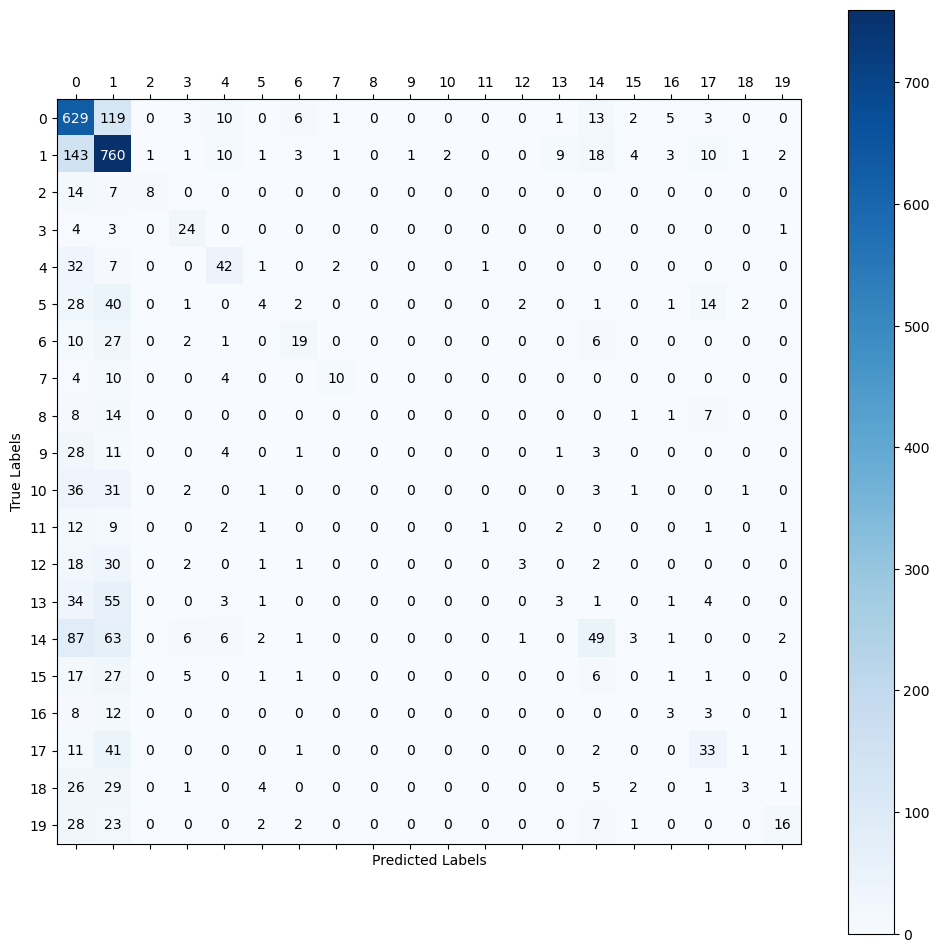

In [16]:
import numpy as np
import matplotlib.pyplot as plt


# Plotten der Confusion Matrix mit größerer figsize
fig, ax = plt.subplots(figsize=(12, 12))  # Hier wird die Größe des Diagramms angepasst
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)

# Hinzufügen einer Farbleiste
plt.colorbar(cax)

# Achsenbeschriftungen
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Setzen der Achsenticks
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))

# Setzen der Tick-Labels (hier als Beispiel nur Zahlen)
ax.set_xticklabels(np.arange(conf_matrix.shape[1]))
ax.set_yticklabels(np.arange(conf_matrix.shape[0]))

# Hinzufügen der Werte in die Matrixzellen
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()



In [17]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Decision Tree Modell erstellen
dtree = DecisionTreeClassifier(random_state=42)

# Modell trainieren
dtree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [18]:

from sklearn.metrics import accuracy_score, confusion_matrix

# Vorhersagen auf Testdaten
y_pred = dtree.predict(X_test)

# Genauigkeit berechnen
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Konfusionsmatrix erstellen
conf_matrix = confusion_matrix(y_test, y_pred)



Accuracy: 0.5830542531815137
Confusion Matrix:
[[598  64   3   1   9   7   3   1   3   9   9   6   4  12  28  10   8   6
    4   7]
 [ 59 696   4   1   2  27  15   6   2   4   9   8  12  33  29   7   8  19
   12  17]
 [  4   5  17   0   0   1   0   1   0   0   0   0   0   0   0   0   1   0
    0   0]
 [  2   3   0  21   0   0   1   0   0   0   0   0   0   0   2   3   0   0
    0   0]
 [ 19   3   0   1  57   1   0   0   0   0   2   1   0   0   0   0   0   1
    0   0]
 [  5  27   0   0   2  24   3   1   0   1   4   1   1   3   3   5   1   8
    5   1]
 [  2  15   0   1   0   0  33   0   0   1   2   0   2   2   0   3   0   1
    3   0]
 [  0   8   0   1   4   0   0  13   0   0   0   1   0   0   1   0   0   0
    0   0]
 [  4   2   0   0   0   0   1   0   8   4   1   0   1   0   2   0   3   3
    1   1]
 [ 10  13   0   0   3   0   0   0   0   5   2   5   1   4   3   0   0   1
    1   0]
 [ 15  10   0   0   4   2   0   1   1   2  17   1   3   5  11   1   0   0
    1   1]
 [  5   3   0   0 

['goals', 'axioms', 'clauses', 'literals', 'term_cells', 'unitgoals', 'unitaxioms', 'horngoals', 'hornaxioms', 'eq_clauses', 'peq_clauses', 'groundunitaxioms', 'groundgoals', 'groundpositiveaxioms', 'positiveaxioms', 'ng_unit_axioms_part', 'ground_positive_axioms_part', 'max_fun_arity', 'avg_fun_arity', 'sum_fun_arity', 'clause_max_depth', 'clause_avg_depth', 'order', 'num_of_definitions', 'perc_of_form_defs', 'perc_of_appvar_lits', 'quantifies_booleans', 'has_defined_choice']
goals: 0.026942608390356605
axioms: 0.0353309875744641
clauses: 0.03677823534262663
literals: 0.06147801401503566
term_cells: 0.15815243481727603
unitgoals: 0.03156872420003055
unitaxioms: 0.027853713660397825
horngoals: 0.024931656822639252
hornaxioms: 0.07357352720423009
eq_clauses: 0.09679533504699299
peq_clauses: 0.045315801741425445
groundunitaxioms: 0.030247447859102796
groundgoals: 0.042730770172369696
groundpositiveaxioms: 0.030941417846264193
positiveaxioms: 0.030473487012906753
ng_unit_axioms_part: 0.04

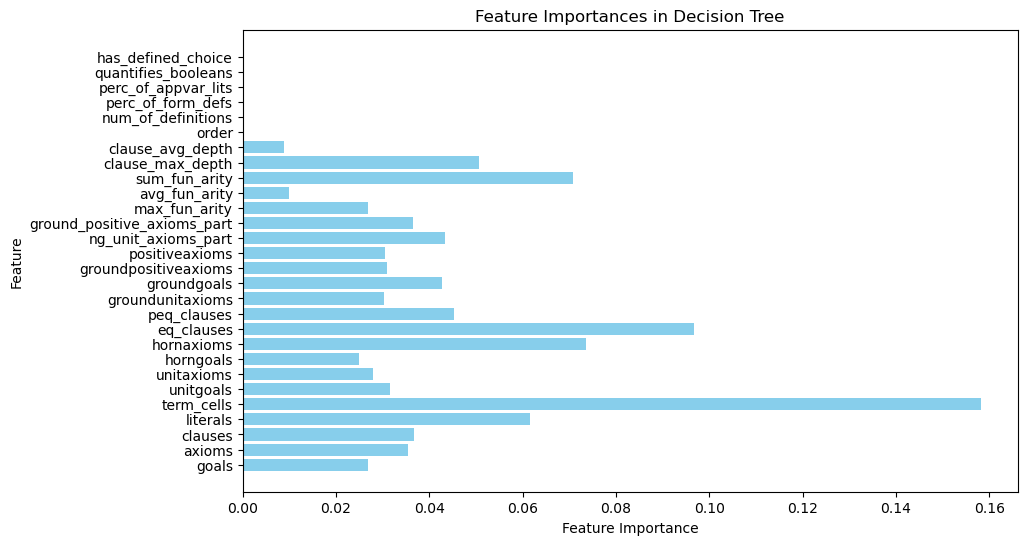

In [39]:
num_features = 29
feature_names  = [
    'goals',
    'axioms',
    'clauses',
    'literals',
    'term_cells',
    'unitgoals',
    'unitaxioms',
    'horngoals',
    'hornaxioms',
    'eq_clauses',
    'peq_clauses',
    'groundunitaxioms',
    'groundgoals',
    'groundpositiveaxioms',
    'positiveaxioms',
    'ng_unit_axioms_part',
    'ground_positive_axioms_part',
    'max_fun_arity',
    'avg_fun_arity',
    'sum_fun_arity',
    'clause_max_depth',
    'clause_avg_depth',
    'order',
    'num_of_definitions',
    'perc_of_form_defs',
    'perc_of_appvar_lits',
    'quantifies_booleans',
    'has_defined_choice'
]

print(feature_names)


feature_importances = dtree.feature_importances_
# Feature-Wichtigkeiten anzeigen
for name, importance in zip(feature_names, feature_importances):
    print(f"{name}: {importance}")

# Visualisierung der Feature-Wichtigkeiten
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree')
plt.show()

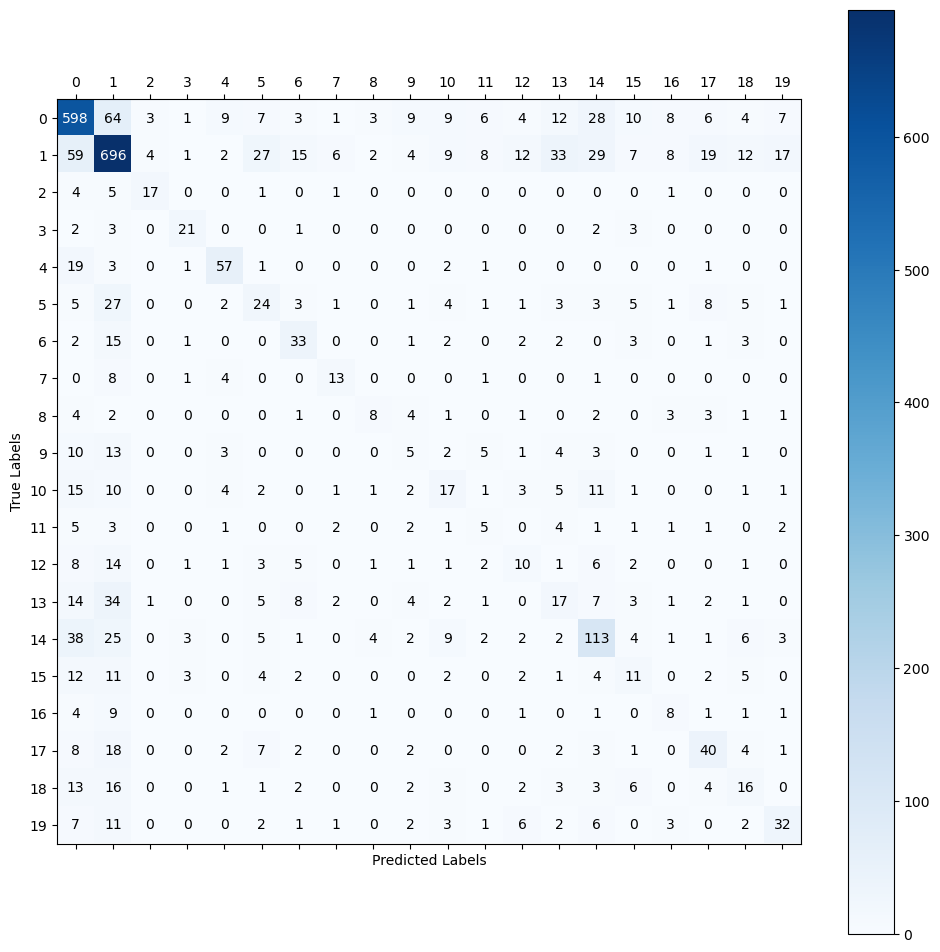

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# Plotten der Confusion Matrix mit größerer figsize
fig, ax = plt.subplots(figsize=(12, 12))  
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)

# Hinzufügen einer Farbleiste
plt.colorbar(cax)

# Achsenbeschriftungen
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')

# Setzen der Achsenticks
ax.set_xticks(np.arange(conf_matrix.shape[1]))
ax.set_yticks(np.arange(conf_matrix.shape[0]))

# Setzen der Tick-Labels (hier als Beispiel nur Zahlen)
ax.set_xticklabels(np.arange(conf_matrix.shape[1]))
ax.set_yticklabels(np.arange(conf_matrix.shape[0]))

# Hinzufügen der Werte in die Matrixzellen
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(j, i, format(conf_matrix[i, j], 'd'),
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")

plt.show()



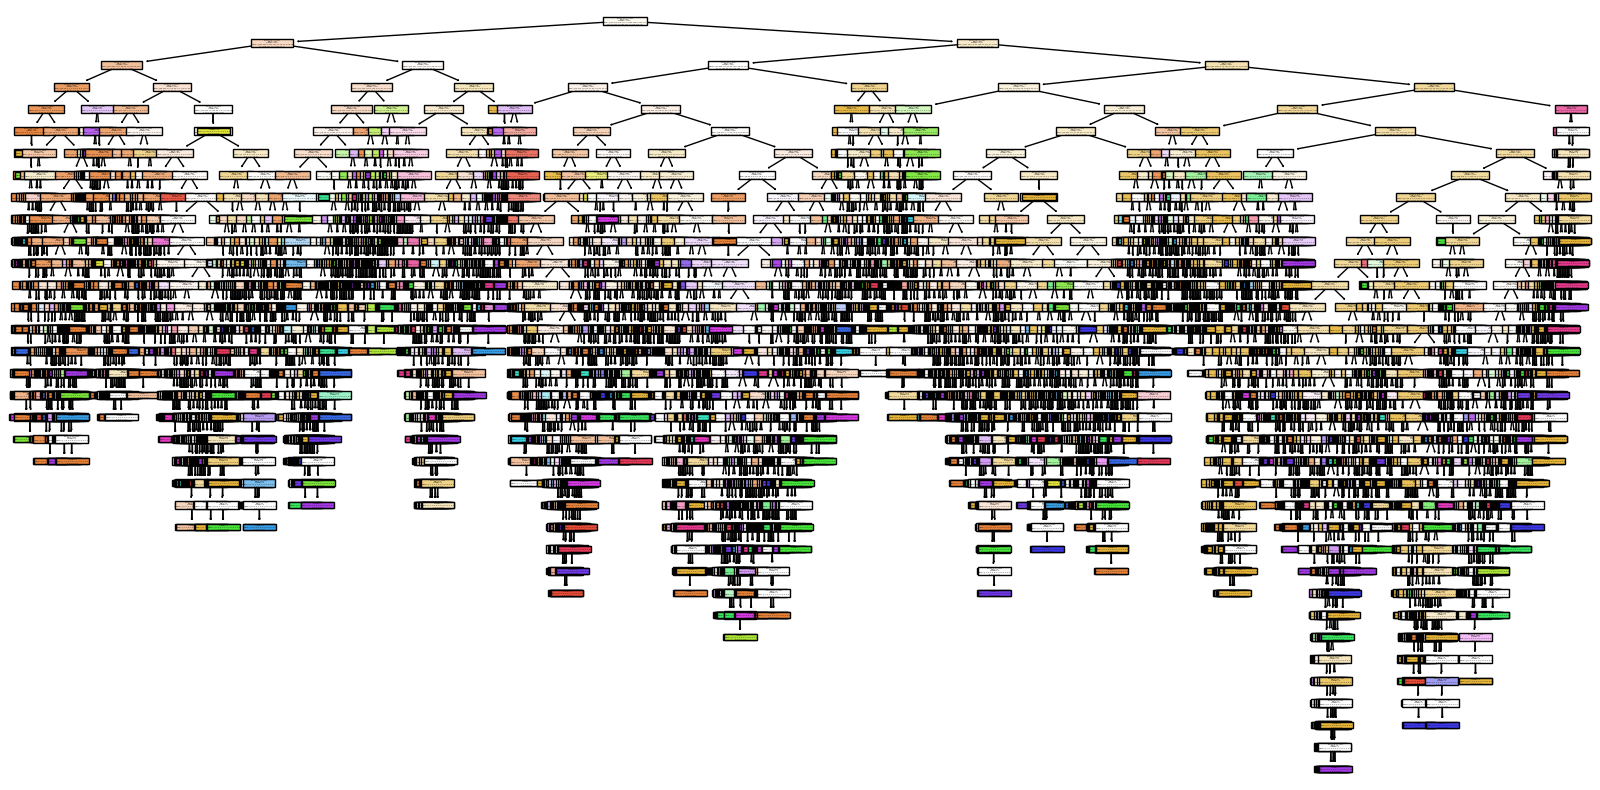

In [20]:
plt.figure(figsize=(20,10))
plot_tree(dtree, filled=True, feature_names=feature_columns)
plt.show()

In [21]:
from sklearn.tree import export_graphviz
import graphviz

# Exportieren des Decision Trees als Dot-Datei
dot_data = export_graphviz(dtree, out_file="dec.dot", 
                           feature_names=feature_columns,  
                           class_names=True,
                           filled=True, rounded=True,  
                           special_characters=True)



In [22]:
#K suchen (Kreuzvalidierung)

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# KNN-Modell
knn = KNeighborsClassifier()


param_grid = {'n_neighbors': list(range(1, 31))}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)  # 5-fache Kreuzvalidierung

knn_gscv.fit(X_scaled, y)

best_k = knn_gscv.best_params_['n_neighbors']
print(f'Optimales k: {best_k}')


Optimales k: 28


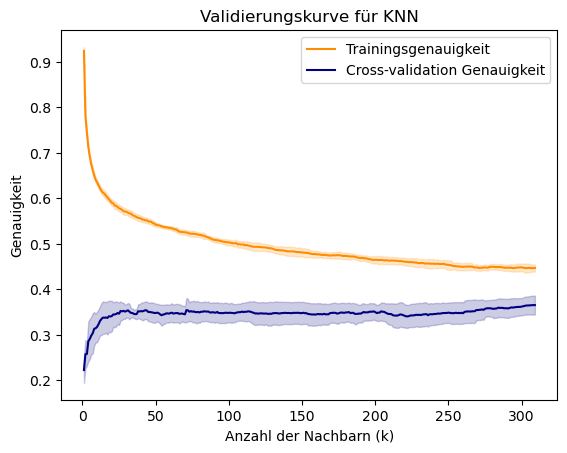

In [23]:
#K suchen (Validierung)

import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
import numpy as np

# Bereich der 'k' Werte
param_range = range(1, 310)

# Validierungskurve berechnen
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_scaled, y, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", cv=5)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, label="Trainingsgenauigkeit", color="darkorange")
plt.plot(param_range, test_mean, label="Cross-validation Genauigkeit", color="navy")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="darkorange", alpha=0.2)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="navy", alpha=0.2)

plt.title("Validierungskurve für KNN")
plt.xlabel("Anzahl der Nachbarn (k)")
plt.ylabel("Genauigkeit")
plt.legend(loc="best")
plt.show()


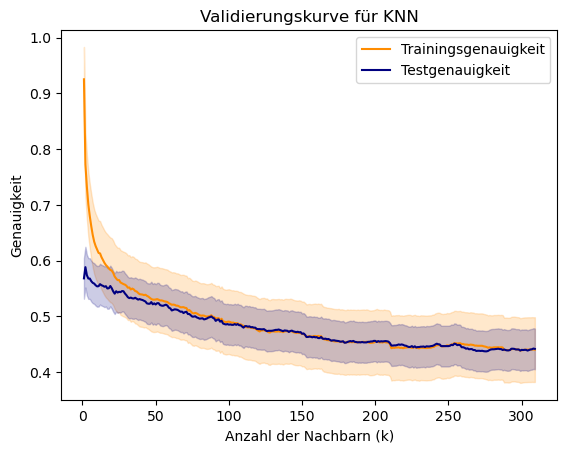

In [24]:

param_range = range(1, 310)
train_scores = []
test_scores = []

for k in param_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Vorhersagen für Trainings- und Testdaten
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    # Genauigkeit berechnen
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

train_scores = np.array(train_scores)
test_scores = np.array(test_scores)

# Plot
plt.plot(param_range, train_scores, label="Trainingsgenauigkeit", color="darkorange")
plt.plot(param_range, test_scores, label="Testgenauigkeit", color="navy")

plt.fill_between(param_range, train_scores - np.std(train_scores), train_scores + np.std(train_scores), color="darkorange", alpha=0.2)
plt.fill_between(param_range, test_scores - np.std(test_scores), test_scores + np.std(test_scores), color="navy", alpha=0.2)

plt.title("Validierungskurve für KNN")
plt.xlabel("Anzahl der Nachbarn (k)")
plt.ylabel("Genauigkeit")
plt.legend(loc="best")
plt.show()

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=50)

scores = cross_val_score(knn, X_scaled, y, cv=5)
print(f'Kreuzvalidierungs-Scores: {scores}')
print(f'Mittlerer Score: {scores.mean()}')
print(f'Standardabweichung des Scores: {scores.std()}')


Kreuzvalidierungs-Scores: [0.32685867 0.33087743 0.33791025 0.3638191  0.38023451]
Mittlerer Score: 0.34793999019432953
Standardabweichung des Scores: 0.020645727829501012


Beste k: 43
Beste mittlere Genauigkeit: 0.35410261847303054


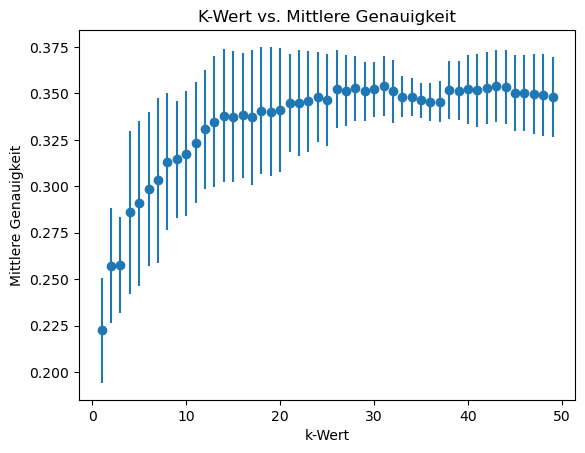

In [26]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Testen Sie verschiedene Werte für k
k_values = range(1, 50) 
mean_scores = []
std_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5)
    mean_scores.append(scores.mean())
    std_scores.append(scores.std())

# Finden Sie den besten k-Wert
best_k = k_values[np.argmax(mean_scores)]
best_score = max(mean_scores)

print(f'Beste k: {best_k}')
print(f'Beste mittlere Genauigkeit: {best_score}')

# Plotten der Ergebnisse
import matplotlib.pyplot as plt

plt.errorbar(k_values, mean_scores, yerr=std_scores, fmt='o')
plt.xlabel('k-Wert')
plt.ylabel('Mittlere Genauigkeit')
plt.title('K-Wert vs. Mittlere Genauigkeit')
plt.show()
